In [ ]:
# Doel
## Dit notebook laat zien hoe je python kunt gebruiken om externe data te visaliseren
## De data die we gebruiken is de data van FF1.

# Python
## Geschiedenis
Uitgevonden in 1991 door een Nederlander [Guido van Rossum] (https://nl.wikipedia.org/wiki/Guido_van_Rossum)
Gemaakt om programmeren makkelijker te maken. Veel wordt voor je gedaan/bedacht. Dat maakt het soms wel lastiger ;-)
## Waar gebruik je het voor?
Software Applicaties ( web,games,dektop,IOT)
Taak Automatisering - DevOps, maar ook administratie
Data science
Web scraping
## Waarom Python?
Makkelijk te leren, maar ook makkelijk om lastige dingen mee te doen.
Naast de basis is er veel code gemaakt die je kan gebruiken, bijvoorbeeld voor machine learning (zie hieronder)
## Hoe?
Via de command line (lastig)
In de browser: Jupyter, Kaggle, Databricks
Via een IDE (programmeer omgeving): PyCharm, VSCode, Spyder


# Deel 1: comments
De computer zal alle code uitvoeren, ongeacht wat er staat. Maar voor mensen is het handig als je uitlegt wat je doet.
Dat doe je met comments. In python is dat met een #. Alles wat na de # staat wordt niet uitgevoerd.
Daarmee kun je ook code even 'uitzetten' om iets te testen.
Hieronder gebruiken we comments om de code uit te leggen.

In [26]:
# Zoals gezegd, kun je veel code 'ophalen', kijk wel of je de bron vertrouw
# Ophalen doe je met het commando 'import'
# Hieronder laden we code die we nodig hebben om data te tonen van F1.
# in dit geval komt het van deze site: https://docs.fastf1.dev

import pandas as pd
%pip install fastf1 # dit installeert de code in het notebook
import fastf1 as ff1 # dit laadt de code in het notebook

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl


Note: you may need to restart the kernel to use updated packages.


In [22]:
year = 2022
wknd = 11
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma

In [23]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.0.4]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been writte

In [24]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

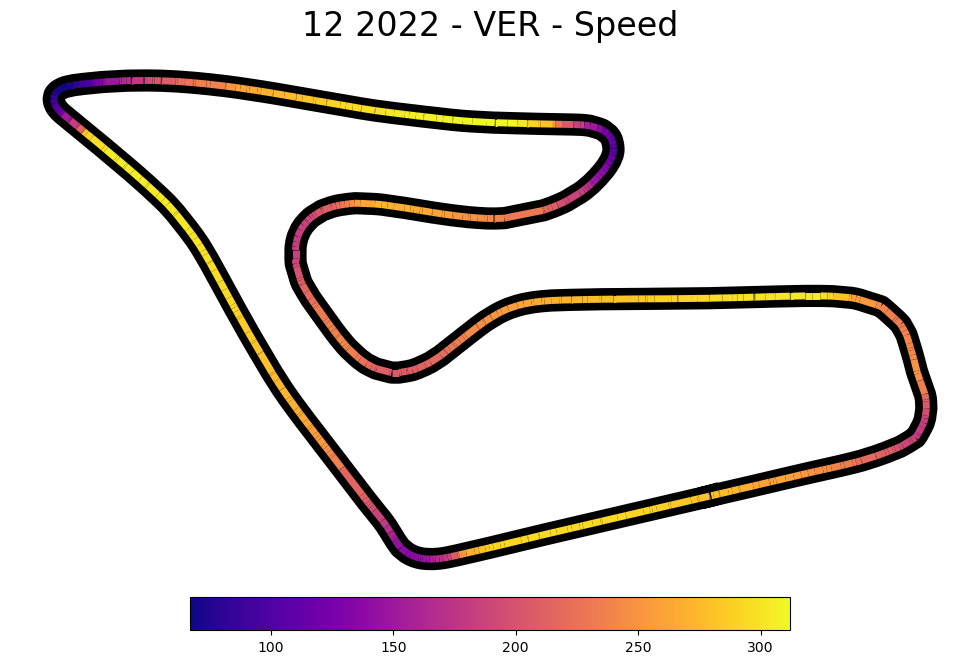

In [25]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()